# Project: Investigate a Dataset (No_show appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset Description**

>  This dataset includes information about over 100,000 medical appointments of different patients from different neighborhoods in Brazil, and this dataset discuss very important points that why a person makes a doctor appointment, receives all the instructions and no-show. so I will make explaratory analysis to get hang of this dataset.

In [44]:
# first, i will set up import statements for all of the packages that i plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# i will include a 'magic word' so that my visualizations are plotted
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#now, i need to load required data and check for the first five rows
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [7]:
#changing columns to lower case will make the dataset easy to deal with
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#it seems that specific columns names are wrong and needs to be changed.
df.rename({"patientid":"patient_id","appointmentid":"appointment_id", "scheduledday":"scheduled_day", "appointmentday":"appointment_day", "hipertension":"hypertension", "handcap":"handicap", "no-show":"show"}, axis=1, inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#now i need to change 'yes' to 0 and 'no' to 1 to avoid misunderstanding data in show column.
df['show'].replace(['Yes', 'No'], [0, 1], inplace=True)

In [13]:
#check for missing values
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
show               0
dtype: int64

In [14]:
#check duplicated values
df.duplicated().sum()

0

In [15]:
#check for negative values
df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1


In [21]:
#there is one negative value, so it could be dropped
df = df.drop(99832)

In [22]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [23]:
##Chech for the dstatypes of each variables in the dataset
df.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
show                 int64
dtype: object

dataset in scheduledday and appointmentday are in string format, so i need to change them to datetime format

In [27]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df[['scheduled_day', 'appointment_day']].dtypes

scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
dtype: object

patient_id is float64 and appointment_id is int64, so i need to convert them to str because I dont want them when I caluclate or use describe() fun to consider them as a numeric data

In [28]:
df['patient_id'] = df['patient_id'].astype(str)
df['appointment_id'] = df['appointment_id'].astype(str)
df[['patient_id', 'appointment_id']].dtypes

patient_id        object
appointment_id    object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


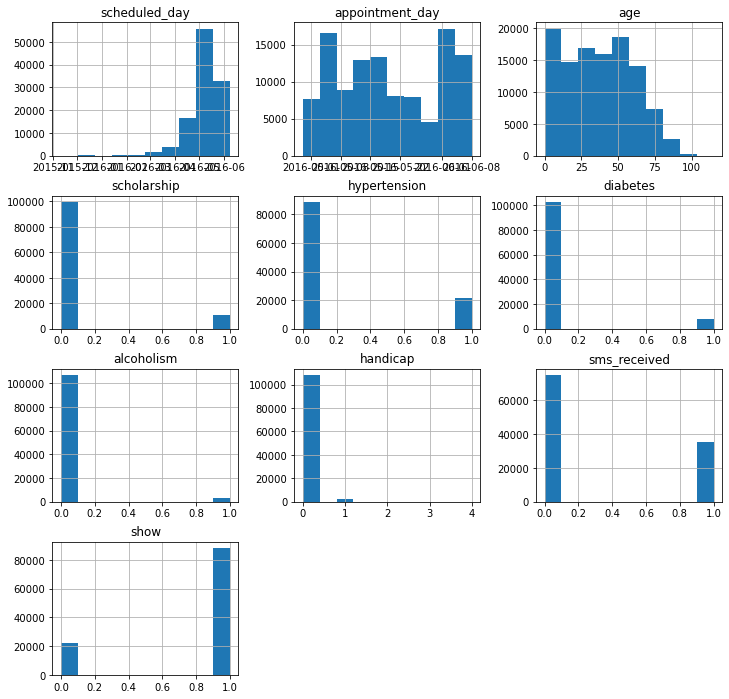

In [29]:
#I need to visualize data by column to examine it
df.hist(figsize=(12, 12));

### Q1 (Is there a correlation between the dataset)

In [30]:
df.corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


**Conclusions from last step**:
> **hypertension and diabetes** have moderate postive correlation(0.43).

> **alcoholism and show** don't have any relationship(0.0002). This means it wouldn't affect showing up of the patient.

> **hypertension and age** have strong postive correlation(0.5).

> **scholarship and show** have negative correlation(-0.02). This means that not having scholarship will increase the possibility of showing up.


> **sms_received and show** have strong negative correlation(-0.13). This means that not receiving sms will increase the possibility of showing up.

### Q2 (Does the gender affect showing up of the patient ?)

In [50]:
#let's take a look about show counts based on gender
df.groupby(['gender', 'show']).count()['patient_id']

gender  show
F       0       14594
        1       57245
M       0        7725
        1       30962
Name: patient_id, dtype: int64

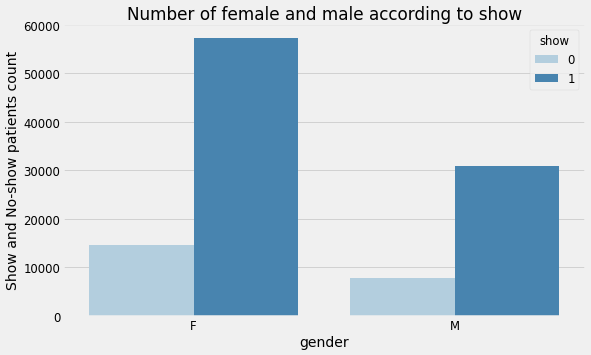

In [47]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,6), dpi=60)

sns.countplot(data= df, x= 'gender', hue='show', palette= 'Blues')

plt.title('Number of female and male according to show')
plt.ylabel('Show and No-show patients count')
plt.show()

That was just the count of show based on gender .. now i need to calculate the percentage to find if gender affects showing up or not.

In [54]:
#calculating the count of gender
gender_count = df.groupby('gender').count()['patient_id']
gender_count

gender
F    71839
M    38687
Name: patient_id, dtype: int64

In [55]:
#calculating count of male and female that shows up
gender_show = df[['gender', 'show']].value_counts()
gender_show

gender  show
F       1       57245
M       1       30962
F       0       14594
M       0        7725
dtype: int64

Text(0.5, 1.2, "Ratio of female who showed up and who didn't show up ")

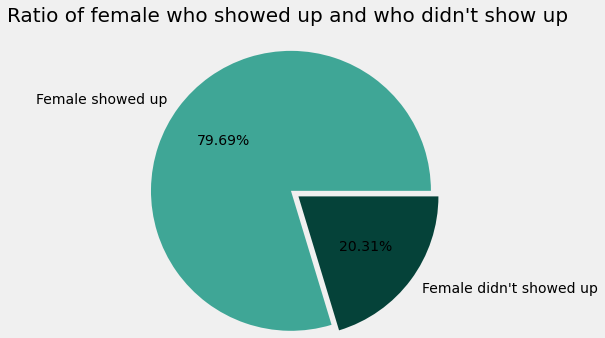

In [68]:
#calculating female ratio
label = ["Female showed up", "Female didn't showed up"]
colors = ['#3fa696', '#054239']
female_ratio = (gender_show['F']/gender_count['F'])*100

plt.pie(female_ratio, radius=1.5, labels=label, explode=[0, 0.1], colors=colors, autopct='%0.2f%%')
plt.title("Ratio of female who showed up and who didn't show up ",fontsize=20, y=1.2) 

Text(0.5, 1.2, "Ratio of male who showed up and who didn't show up ")

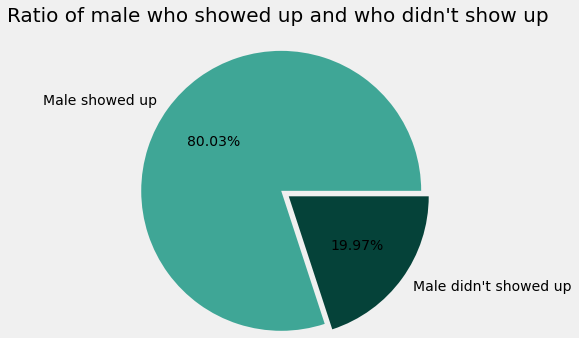

In [69]:
#calculating male ratio
label = ["Male showed up", "Male didn't showed up"]
colors = ['#3fa696', '#054239']
male_ratio = (gender_show['M']/gender_count['M'])*100

plt.pie(male_ratio, radius=1.5, labels=label, explode=[0, 0.1], colors=colors, autopct='%0.2f%%')
plt.title("Ratio of male who showed up and who didn't show up ",fontsize=20, y=1.2) 

**Conclusions about last step**:
> We can find out that **gender** didn't affect showing up because both percentages of female who showed up and male are almost equal.

###  Q3  (Does the gender with diabetes affect showing up of the patient ?)

In [70]:
#let's first groub data by gender and diabetes and show to see how many patients showed up based on gender and diabetes.
df.groupby(['gender', 'diabetes', 'show']).count()['patient_id']

gender  diabetes  show
F       0         0       13577
                  1       52656
        1         0        1017
                  1        4589
M       0         0        7312
                  1       29038
        1         0         413
                  1        1924
Name: patient_id, dtype: int64

Text(0.5, 1.0, 'Show up of the patient based on the gender and the diabetes')

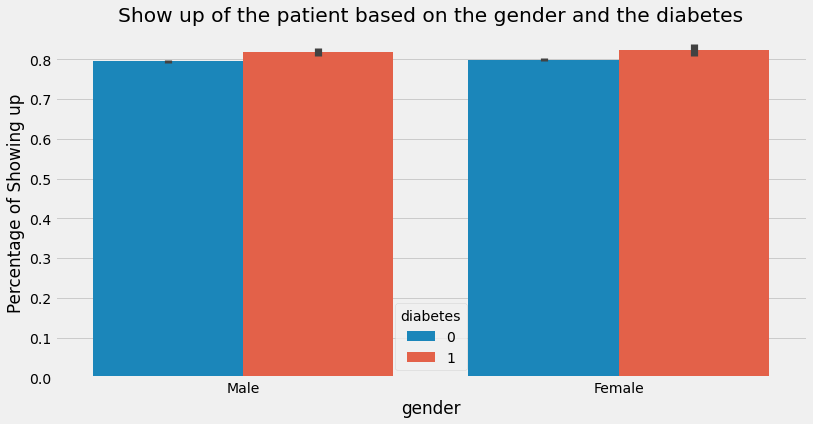

In [75]:
#now let's make a bar plot to answer the question.
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='show', hue='diabetes', data=df)

plt.xticks([0,1],['Male', 'Female'])
plt.ylabel('Percentage of Showing up')
plt.title('Show up of the patient based on the gender and the diabetes')

**Conclusions about last step**:
> We can find out that **gender with diabetes** affects showing up because we can see that both gender with diabetes showed up more than others who didn't have diabetes.

### Q4 (Does the gender with alcoholism affect showing up of the patient ?)

In [76]:
#let's first groub data by gender and alcoholism and show to see how many patients showed up based on gender and alcoholism.

df.groupby(['gender', 'alcoholism', 'show']).count()['patient_id']

gender  alcoholism  show
F       0           0       14286
                    1       56330
        1           0         308
                    1         915
M       0           0        7356
                    1       29194
        1           0         369
                    1        1768
Name: patient_id, dtype: int64

Text(0.5, 1.0, 'Show up of the patient based on the gender and the alcoholism')

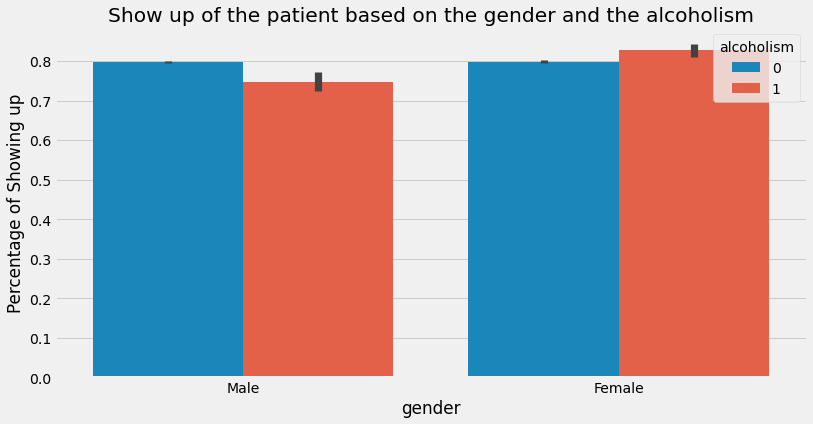

In [77]:
#now let's make a bar plot to answer the question.
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='show', hue='alcoholism', data=df)

plt.xticks([0,1],['Male', 'Female'])
plt.ylabel('Percentage of Showing up')
plt.title('Show up of the patient based on the gender and the alcoholism')

**Conclusions about last step**:
> We can find out that **gender with alcoholism** doesn't affect showing up because of two observations:

> for male: patients having alcoholism showed up less than patients who don't have alcoholism.

> for female: patients having alcoholism showed up more than patients who don't have alcoholism.

### Q5 (which day of the week has the most precentage of showing up ?)


In [82]:
# the count of each day of appointment
# first lets convert appointment_day to date
df['day_of_appointment'] = pd.to_datetime(df['appointment_day']).dt.day_name()
day_count = df.groupby('day_of_appointment')['show'].count()
day_count

day_of_appointment
Friday       19019
Monday       22714
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: show, dtype: int64

In [84]:
# the number of people who show up in the appointment day
show_count = df.groupby('day_of_appointment')['show'].sum()
show_count

day_of_appointment
Friday       14982
Monday       18024
Saturday        30
Thursday     13909
Tuesday      20488
Wednesday    20774
Name: show, dtype: int64

In [86]:
# the percentage of each day poeple show up in the appointment day
show_per = df.groupby('day_of_appointment')['show'].mean()
show_per

day_of_appointment
Friday       0.787739
Monday       0.793519
Saturday     0.769231
Thursday     0.806459
Tuesday      0.799064
Wednesday    0.803108
Name: show, dtype: float64

Text(0.5, 1.2, 'Percentage the day of the week according to show up')

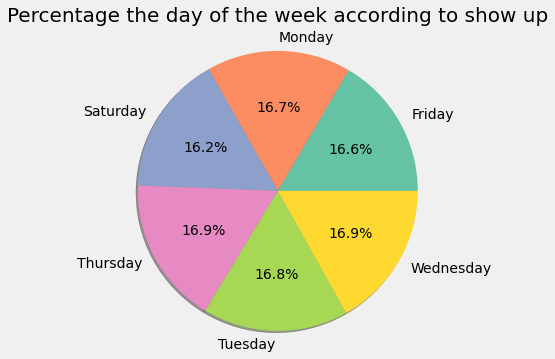

In [113]:

day_label = ["Friday", "Monday", "Saturday", "Thursday", "Tuesday", "Wednesday"]
color = sns.color_palette("Set2")
plt.pie(show_per, radius=1.5, labels=day_label, colors=color, autopct='%0.1f%%', shadow=True)
plt.title("Percentage the day of the week according to show up",fontsize=20, y=1.2) 

**Thursday** has the most percentage of showing up.

<a id='conclusions'></a>
## Conclusions

> **Gender** doesn't affect showing up becuase the ratio from female to male are almost the same.

> **Diabetes** is a strong features that affect showing up of the patient.

> There is no relation between **alcoholism** and showing up.

> There is not a specific **day** that has preference than the otherو they are all the same when it comes to show up.

<a id='limitations'></a>
## Limitations

> **Age** column has a large number of 0 values and it doesn't make sense according to the project.

> The data just has three **months** ( April, May, June)

> Most of the variables are categorical, which doesn't allow for a high level of statistical method.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0